## Import

In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import silhouette_score## Import

## Scenario 3:
以 soccer1.jpg 以及 soccer2.jpg 中的場地 pixel 建構 GMM，稱此模型為 M2，並以 soccer1.jpg 以及 soccer2.jpg 做測試

In [2]:
img = cv.imread('soccer1.jpg')
img2 = cv.imread('soccer2.jpg')

soccer1 = img.reshape((-1,3))
soccer2 = img2.reshape((-1,3))

### Model building by soccer1.jpg, soccer2.jpg

In [3]:
GMM_model = GMM(n_components=2, covariance_type='tied').fit(soccer1)
GMM_model = GMM_model.fit(soccer2)

### Test by soccer1.jpg

In [4]:
prediction1 = GMM_model.predict(soccer1)

### Evaluation

In [5]:
soccer1_mask = pd.read_csv('soccer1_mask.csv',)
test1 = np.array(soccer1_mask['GT (True/False)'])
test1 = test1.reshape((-1, 1))

In [6]:
print("Scenario 3 GMM silhouette score of soccer1.jpg: ", silhouette_score(test1, prediction1))

Scenario 3 GMM silhouette score of soccer1.jpg:  0.7602073663214661


### Segmentation result

In [7]:
def getSegmentation(pred):
    result = []
    for i in pred:
        tmp = []
        for j in i:
            if(j == 0):
                tmp.append([255,255,255])
            else:
                tmp.append([0,0,0])
        result.append(tmp)
    return result

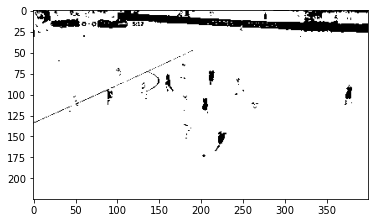

In [8]:
prediction1 = prediction1.reshape(img.shape[0],img.shape[1])
pred1_mask = getSegmentation(prediction1)
pred1_mask = np.array(pred1_mask)
cv.imwrite('./result/Segmentation3-1.jpg', pred1_mask)
plt.imshow(pred1_mask)

### Test by soccer2.jpg

In [9]:
prediction2 = GMM_model.predict(soccer2)

### Evaluation

In [10]:
soccer2_mask = pd.read_csv('soccer2_mask.csv',)
test2 = np.array(soccer2_mask['GT (True/False)'])
test2 = test2.reshape((-1, 1))

In [11]:
print("Scenario 3 GMM silhouette score of soccer2.jpg: ", silhouette_score(test2, prediction2))

Scenario 3 GMM silhouette score of soccer2.jpg:  0.405631162151769


### Segmentation result

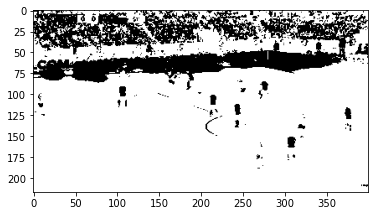

In [12]:
prediction2 = prediction2.reshape(img2.shape[0],img2.shape[1])
pred2_mask = getSegmentation(prediction2)
pred2_mask = np.array(pred2_mask)
cv.imwrite('./result/Segmentation3-2.jpg', pred2_mask)
plt.imshow(pred2_mask)